# Loading the Dataset

In [1]:
import kagglehub
path = kagglehub.dataset_download("vishakhdapat/imdb-movie-reviews")

Using Colab cache for faster access to the 'imdb-movie-reviews' dataset.


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(f"{path}/IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Initial Data Exploration (Already done in NLP_BoW)

# Text Preprocessing

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import re
from nltk.corpus import stopwords

def remove_htmltags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

def lowercasing(raw_text):
    cleaned_text = raw_text.lower()
    return cleaned_text

def remove_stopwords(raw_text):
    exclude = stopwords.words('english')
    new_text = []
    for word in raw_text.split():
        if word in exclude:
            new_text.append('')
        else:
            new_text.append(word)
    cleaned_text = "".join(new_text)
    return cleaned_text

In [7]:
# Removing Duplicate Values
df = df.drop_duplicates()

In [8]:
# Removing HTML Tags
df.loc[:, 'review'] = df['review'].apply(remove_htmltags)

In [9]:
# Lowercasing
df.loc[:, 'review'] = df['review'].apply(lowercasing)

In [10]:
# Removing Stopwords
df.loc[:, 'review'] = df['review'].apply(remove_stopwords)

# Encoding Target Column

In [11]:
x = df.drop(columns=['sentiment'])
y = df['sentiment']

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [13]:
y

array([1, 1, 1, ..., 0, 0, 0])

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Text Vectorization

In [15]:
# Applying BoW
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)

x_train_vec = vectorizer.fit_transform(x_train['review']).toarray()
x_test_vec = vectorizer.transform(x_test['review']).toarray()

# Naive Bayes Model

In [16]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train_vec, y_train)

GaussianNB()

In [17]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test_vec)

accuracy_score(y_test, y_pred)

0.67560754260361

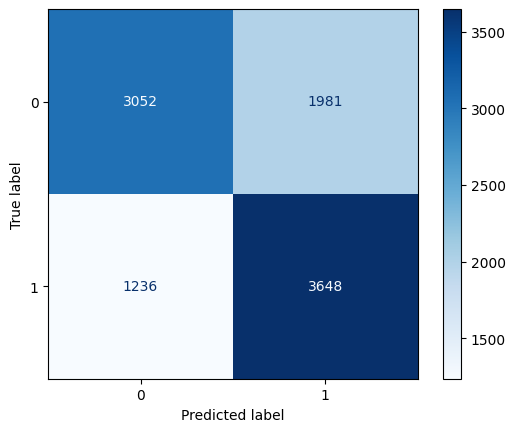

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# Linear SVC

In [19]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(x_train_vec, y_train)

LinearSVC()

In [20]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test_vec)

accuracy_score(y_test, y_pred)

0.6956740949884037

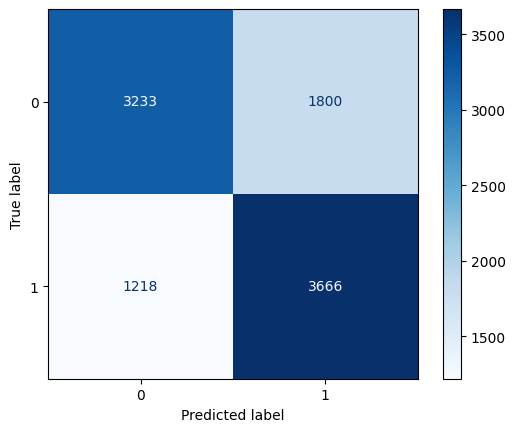

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train_vec, y_train)

LogisticRegression()

In [26]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test_vec)

accuracy_score(y_test, y_pred)

0.7000100836946658

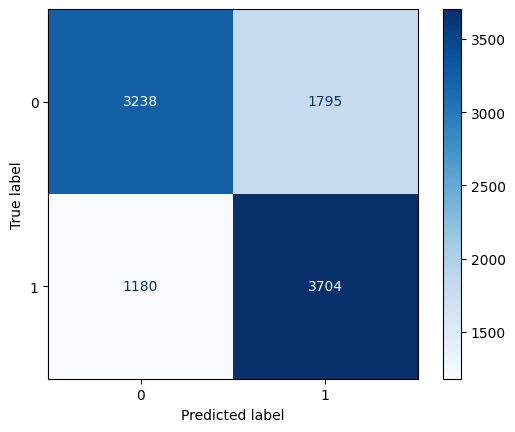

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()